<a href="https://colab.research.google.com/github/anatorres09/DE-MRI_Classificacio_CNN/blob/main/Visualitzaci%C3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
# Clonar el repositori del GitHUb que conté les imatges
!git clone https://github.com/anatorres09/DE-MRI_Classificacio_CNN.git
! ls

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Cloning into 'DE-MRI_Classificacio_CNN'...
remote: Enumerating objects: 1106, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (165/165), done.
remote: Total 1106 (delta 116), reused 182 (delta 79), pack-reused 862
Receiving objects: 100% (1106/1106), 178.28 MiB | 10.84 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Updating files: 100% (156/156), done.
DE-MRI_Classificacio_CNN  sample_data


In [2]:
# Connectar a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import nibabel as nib
import matplotlib.pyplot as plt

In [4]:
# Directoris
data_path = '/content/DE-MRI_Classificacio_CNN/dataset' 
drive_folder = '/content/drive/MyDrive/CNN'

In [5]:
# Rutes de les carpetes amb les imatges 3D
ruta_Im3D_normal = os.path.join(data_path, "entrenament", "normal")
ruta_Im3D_patologic = os.path.join(data_path, "entrenament", "patologic")
ruta_Im3D_test = os.path.join(data_path, "test")


# Rutes de les carpetes amb les imatges 2D
ruta_Im2D_normal = os.path.join(drive_folder, "corr_entrenament", "corr_normal")
ruta_Im2D_patologic = os.path.join(drive_folder, "corr_entrenament", "corr_patologic")
ruta_Im2D_test = os.path.join(drive_folder, "test")

Arxius disponibles:
     1.normal
     2.patològic
     3.test
Indiqui el número de la carpeta que vol visualitzar: 1
Arxius disponibles:
1. Case_N033.nii
2. Case_N012.nii
3. Case_N070.nii
4. Case_N068.nii
5. Case_N020.nii
6. Case_N089.nii
7. Case_N048.nii
8. Case_N058.nii
9. Case_N024.nii
10. Case_N034.nii
11. Case_N037.nii
12. Case_N014.nii
13. Case_N025.nii
14. Case_N013.nii
15. Case_N046.nii
16. Case_N049.nii
17. Case_N054.nii
18. Case_N027.nii
19. Case_N032.nii
20. Case_N018.nii
21. Case_N023.nii
22. Case_N030.nii
23. Case_N016.nii
24. Case_N042.nii
25. Case_N065.nii
26. Case_N041.nii
27. Case_N052.nii
28. Case_N040.nii
29. Case_N083.nii
30. Case_N075.nii
31. Case_N084.nii
32. Case_N079.nii
Indiqui el número de l'arxiu que vol visualizar: 5


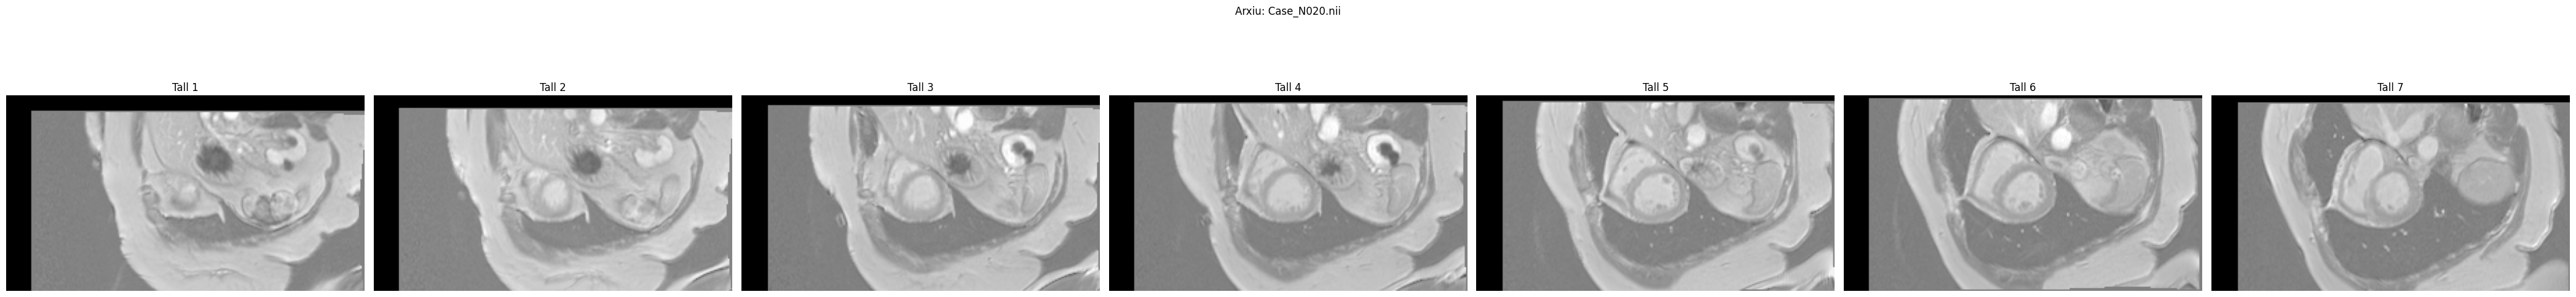

In [6]:
# Mostrar la llista de arxius disponibls
print("Arxius disponibles:")
print("     1.normal")
print("     2.patològic")
print("     3.test")


# Sol·licitar a l'usuari que indiqui el número del arxiu que vol visualitzar
opcio1 = int(input("Indiqui el número de la carpeta que vol visualitzar: ")) - 1

# Triar la carpeta desitjada
if opcio1 == 0:
    ruta_carpeta = ruta_Im3D_normal
    nom_carpeta = "normal"
elif opcio1 == 1:
    ruta_carpeta = ruta_Im3D_patologic
    nom_carpeta = "patològic"
elif opcio1 == 2:
    ruta_carpeta = ruta_Im3D_test
    nomb_carpeta = "test"
else:
    print("Error")

# Obtenir la llista d'arxius NIfTI de la carpeta seleccionada
arxius_nifti = [arxiu for arxiu in os.listdir(ruta_carpeta) if arxiu.endswith(".nii")]


# Mostrar la llista d'arxius disponibles
print("Arxius disponibles:")
for i, arxiu in enumerate(arxius_nifti):
    print(f"{i+1}. {arxiu}")

# Sol·licitar a l'usuari que indiqui el número de l'arxiu que vol visualizar
opcio2 = int(input("Indiqui el número de l'arxiu que vol visualizar: ")) - 1

# Verificar si l'opció indicada és possible
if opcio2 < 0 or opcio2 >= len(arxius_nifti):
    print("Error")
else:
    # Obtenir la ruta completa de l'arxiu seleccionat
    ruta_arxiu_nifti = os.path.join(ruta_carpeta, arxius_nifti[opcio2])

    # Carregar l'arxiu NIfTI
    nifti_img = nib.load(ruta_arxiu_nifti)

    # Obtenir les dades del volum
    volum = nifti_img.get_fdata()

    # Obtenir les dimensions del volum
    alt, amplada, num_talls = volum.shape

    # Crear la figura i els subgràfics
    fig, axes = plt.subplots(1, num_talls, figsize=(6*num_talls, 6))

    # Visualitzar tots els talls
    for i in range(num_talls):
        # Obtenir el tall actual
        tall = volum[:, :, i]

        # Mostrar el tall en el subgràfic corresponent
        axes[i].imshow(tall, cmap="gray")
        axes[i].axis("off")

        # Establir el títol del subgràfic
        axes[i].set_title(f"Tall {i+1}")

    # Obtenir el nom de l'arxiu sense la ruta
    nom_arxiu = os.path.basename(ruta_arxiu_nifti)

    # Establir el títol de la figura
    fig.suptitle(f"Arxiu: {nom_arxiu}")

    # Ajustar l'espai entre els subgràfics
    plt.tight_layout()

    # Mostrar la figura
    plt.show()